# Regression on  2019  Coronavirus (nCoV) Deaths

Notice: This notebook is for learning purpose. It's not an official forecast!

# Load Dependencies & Dataset

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

%matplotlib inline

In [181]:
df_corona = pd.read_csv('./time_series_2019-ncov-Deaths.csv')

# Discover Dataset

In [183]:
df_corona.head()

,Province/State,Country/Region,First confirmed date in country,Lat,Long,1/21/2020 10:00 PM,1/22/2020 12:00 PM,1/23/2020 12:00 PM,1/24/2020 12:00 AM,1/24/2020 12:00 PM,...,2/4/2020 9:40 AM,2/4/2020 10:00 PM,2/5/2020 9:00 AM,2/5/2020 11:00 PM,2/6/2020 9:00 AM,2/6/2020 2:20 PM,2/7/2020 8:13 PM,2/7/2020 10:50 PM,2/8/2020 10:24 AM,2/8/2020 11:04 PM
0,Anhui,Mainland China,1/3/2020,31.82571,117.2264,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,Beijing,Mainland China,1/3/2020,40.18238,116.4142,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2,2
2,Chongqing,Mainland China,1/3/2020,30.05718,107.8740,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2
3,Fujian,Mainland China,1/3/2020,26.07783,117.9895,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Gansu,Mainland China,1/3/2020,36.06110,103.8343,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,1


In [184]:
df_corona.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 40 entries, Province/State to 2/8/2020 11:04 PM
dtypes: float64(35), int64(2), object(3)
memory usage: 22.6+ KB


In [185]:
df_corona.describe()

,Lat,Long,1/21/2020 10:00 PM,1/22/2020 12:00 PM,1/23/2020 12:00 PM,1/24/2020 12:00 AM,1/24/2020 12:00 PM,1/25/2020 12:00 AM,1/25/2020 12:00 PM,1/25/2020 10:00 PM,...,2/4/2020 9:40 AM,2/4/2020 10:00 PM,2/5/2020 9:00 AM,2/5/2020 11:00 PM,2/6/2020 9:00 AM,2/6/2020 2:20 PM,2/7/2020 8:13 PM,2/7/2020 10:50 PM,2/8/2020 10:24 AM,2/8/2020 11:04 PM
count,72.000000,72.000000,0.0,0.0,0.0,3.000000,3.000000,3.000000,3.00000,4.00,...,10.00000,11.000000,13.000000,13.000000,13.000000,13.000000,15.000000,16.000000,72.000000,72.000000
mean,30.244784,64.661324,NaN,NaN,NaN,8.666667,8.666667,11.333333,14.00000,13.75,...,42.60000,44.727273,38.000000,43.461538,43.461538,43.461538,42.533333,45.250000,10.069444,11.291667
std,19.802033,84.254666,NaN,NaN,NaN,13.279056,13.279056,17.897858,22.51666,25.50,...,130.49751,144.032698,132.504717,151.896684,151.896684,151.896684,159.199725,174.337412,82.339443,91.875672
min,-37.813600,-123.121000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.00000,1.00,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,23.796260,17.124475,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.00000,1.00,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,34.050550,105.999850,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.00000,1.00,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,41.163068,117.253050,NaN,NaN,NaN,12.500000,12.500000,16.500000,20.50000,13.75,...,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000
max,61.924100,153.025100,NaN,NaN,NaN,24.000000,24.000000,32.000000,40.00000,52.00,...,414.00000,479.000000,479.000000,549.000000,549.000000,549.000000,618.000000,699.000000,699.000000,780.000000


In [192]:
df_corona.columns

Index(['Province/State', 'Country/Region', 'First confirmed date in country',
       'Lat', 'Long', '1/21/2020 10:00 PM', '1/22/2020 12:00 PM',
       '1/23/2020 12:00 PM', '1/24/2020 12:00 AM', '1/24/2020 12:00 PM',
       '1/25/2020 12:00 AM', '1/25/2020 12:00 PM', '1/25/2020 10:00 PM',
       '1/26/2020 11:00 AM', '1/26/2020 11:00 PM', '1/27/2020 9:00 AM',
       '1/27/2020 7:00 PM', '1/27/2020 8:30 PM', '1/28/2020 1:00 PM',
       '1/28/2020 6:00 PM', '1/28/2020 11:00 PM', '1/29/2020 1:30 PM',
       '1/29/2020 2:30 PM', '1/29/2020 9:00 PM', '1/30/2020 11:00 AM',
       '1/31/2020 2:00 PM', '1/31/2020 7:00 PM', '2/1/2020 10:00 AM',
       '2/2/2020 9:00 PM', '2/3/2020 9:00 PM', '2/4/2020 9:40 AM',
       '2/4/2020 10:00 PM', '2/5/2020 9:00 AM', '2/5/2020 11:00 PM',
       '2/6/2020 9:00 AM', '2/6/2020 2:20 PM', '2/7/2020 8:13 PM',
       '2/7/2020 10:50 PM', '2/8/2020 10:24 AM', '2/8/2020 11:04 PM'],
      dtype='object')

## Check Countries

In [186]:
df_corona.loc[:,'Country/Region'].value_counts()

Mainland China          31
US                       9
Australia                4
Canada                   3
Russia                   1
Italy                    1
Macau                    1
Others                   1
Belgium                  1
France                   1
Nepal                    1
Malaysia                 1
Vietnam                  1
Finland                  1
Germany                  1
Sri Lanka                1
India                    1
United Arab Emirates     1
South Korea              1
Singapore                1
Taiwan                   1
Spain                    1
Philippines              1
Cambodia                 1
Hong Kong                1
Japan                    1
Thailand                 1
UK                       1
Sweden                   1
Name: Country/Region, dtype: int64

## Retrieve & organize data

Get data for Hubei, China. Hubei is the province where Wuhan is. This location counts the highest number of deaths from 24.01.

In [240]:
wuhan_deaths = df_cor[df_corona['Province/State'] == 'Hubei'].dropna(axis=1).drop(labels=['Province/State', 'Country/Region', 'First confirmed date in country', 'Lat', 'Long'], axis=1)

In [241]:
all_dates = []
for i in wuhan_deaths.columns:
    all_dates.append(i[0:9])

unique_date_indices = []
for x in set(all_dates):
    unique_date_indices.append(all_dates.index(x))   
unique_dates = np.sort(unique_date_indices)

wuhan_deaths = np.array(wuhan_deaths.iloc[:, unique_dates])[0]

days_of_virus = np.array(range(1, len(wuhan_deaths)+1))

## Plot data

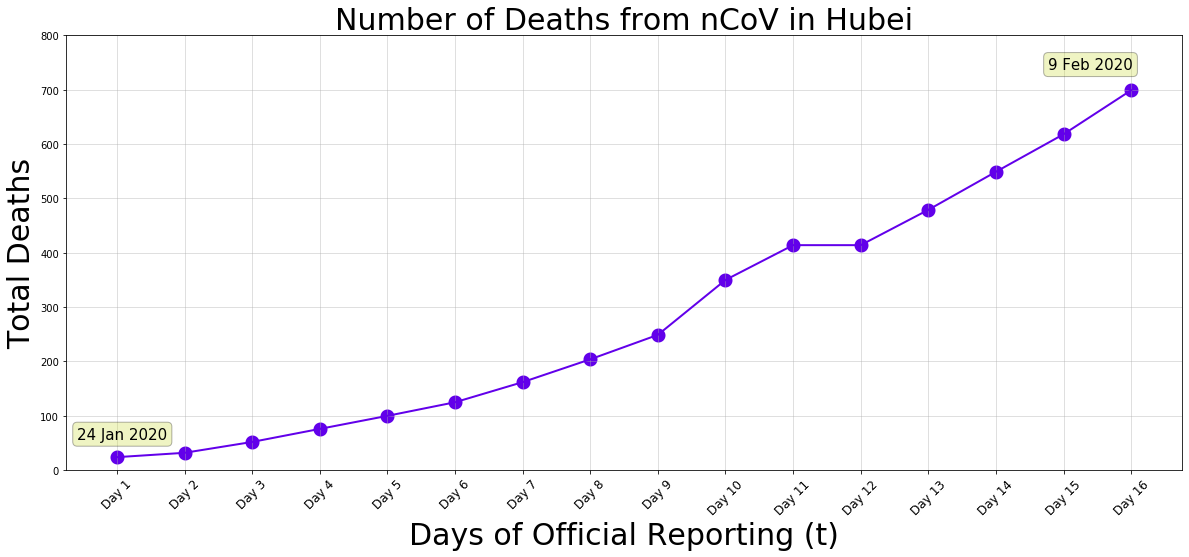

In [256]:
# plot
color_violet = '#6200ea'
accent_color = '#CDDC39'

fig, ax = plt.subplots(figsize=(20,8))
plt.scatter(days_of_virus, wuhan_deaths, linewidth=8, color=color_violet)
plt.plot(days_of_virus, wuhan_deaths, linewidth=2, color=color_violet)

# place a text box
style = dict(boxstyle='round', facecolor=accent_color, alpha=0.3)
ax.text(0.88, 0.95, '9 Feb 2020', transform=ax.transAxes, fontsize=15, verticalalignment='top',bbox=style)
ax.text(0.01, 0.1, '24 Jan 2020', transform=ax.transAxes, fontsize=15, verticalalignment='top', bbox=style)

plt.grid(alpha=0.5)
plt.ylim([0,800])
plt.xticks(ticks=days_of_virus, labels=[f'Day {i}' for i in days_of_virus], rotation=45, size=12)
plt.xlabel('Days of Official Reporting (t)', size=30)
plt.ylabel('Total Deaths', size=30)
plt.title('Number of Deaths from nCoV in Hubei', size=30)
plt.show()

# Regression Analysis

In [336]:
X = days_of_virus
y = wuhan_deaths
days_prediction = np.arange(1,31) #prediction for days 0-30

In [337]:
poly = PolynomialFeatures(degree=2) #2nd poly-order
X_ = poly.fit_transform(X.reshape(-1,1))

X_test_ = poly.fit_transform(days_prediction.reshape(-1,1))

## Build Model

In [338]:
coronaReg = LinearRegression()

# Fit
coronaReg.fit(X_, y)

# Obtain coefficients
coronaReg.coef_

array([ 0.        , 10.43042717,  2.07580532])

## Prediction

In [344]:
predicted_deaths = coronaReg.predict(X_test_)

In [345]:
print("The intercept term of the linear model:", coronaReg.intercept_)
print("The coefficients of the linear model:", coronaReg.coef_)

The intercept term of the linear model: 1.4410714285717177
The coefficients of the linear model: [ 0.         10.43042717  2.07580532]


## Plot Prediction

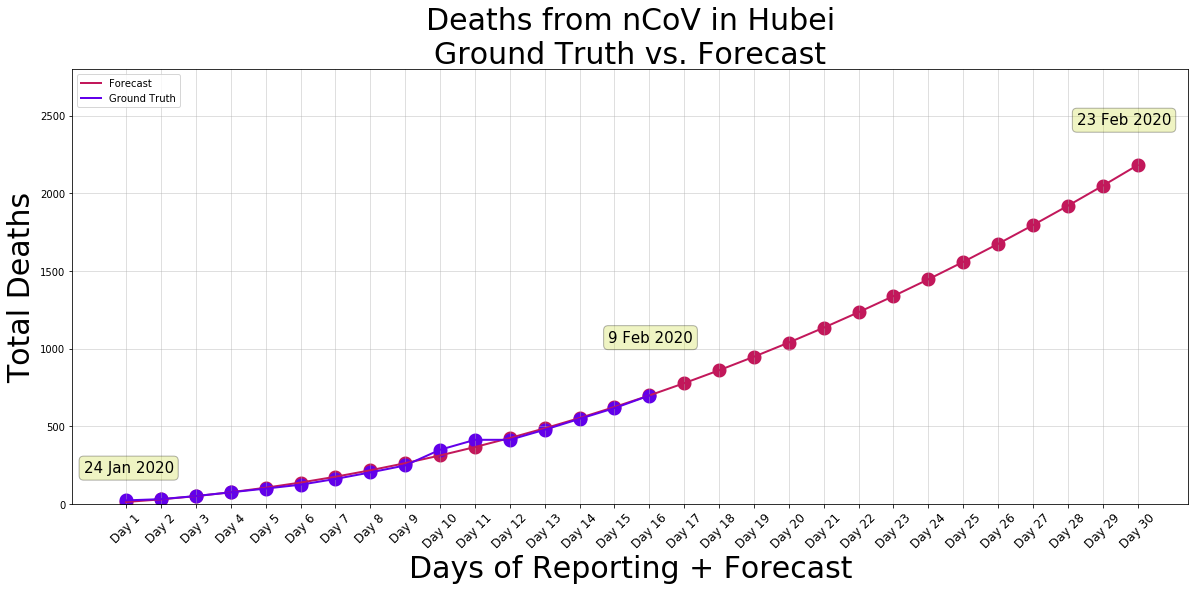

In [346]:
# plot
color_violet = '#6200ea'
accent_color = '#CDDC39'

color_2 = '#C2185B'
color_2_acc = '#00BCD4'

fig, ax = plt.subplots(figsize=(20,8))

plt.scatter(days_prediction, predicted_deaths, linewidth=8, color=color_2)
plt.plot(days_prediction, predicted_deaths, linewidth=2, color=color_2,label="Forecast")

plt.scatter(days_of_virus, wuhan_deaths, linewidth=8, color=color_violet)
plt.plot(days_of_virus, wuhan_deaths, linewidth=2, color=color_violet,label="Ground Truth")

# place a text box
style = dict(boxstyle='round', facecolor=accent_color, alpha=0.3)
ax.text(0.9, 0.90, '23 Feb 2020', transform=ax.transAxes, fontsize=15, verticalalignment='top',bbox=style)
ax.text(0.48, 0.40, '9 Feb 2020', transform=ax.transAxes, fontsize=15, verticalalignment='top',bbox=style)
ax.text(0.01, 0.1, '24 Jan 2020', transform=ax.transAxes, fontsize=15, verticalalignment='top', bbox=style)

plt.grid(alpha=0.5)
plt.ylim([0,2800])
plt.xticks(ticks=days_prediction, labels=[f'Day {i}' for i in days_prediction], rotation=45, size=12)
plt.xlabel('Days of Reporting + Forecast', size=30)
plt.ylabel('Total Deaths', size=30)
plt.title('Deaths from nCoV in Hubei\nGround Truth vs. Forecast', size=30)
plt.legend(loc="upper left")
plt.show()

# Regression evaluation metrices

In [343]:
print("R-squared value of this fit:",round(metrics.r2_score(y,predicted_deaths[:16]),3))
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y,predicted_deaths[:16]))
print("Mean square error (MSE):", metrics.mean_squared_error(y,predicted_deaths[:16]))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y,predicted_deaths[:16])))

R-squared value of this fit: 0.994
Mean absolute error (MAE): 11.919857317927118
Mean square error (MSE): 295.6743456757704
Root mean square error (RMSE): 17.195183793020952
